In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#read 10Y minus 2Y to df: T10Y2Y

T10Y2Y = pd.read_csv("T10Y2Y.csv", na_values ='.')

In [2]:
T10Y2Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    1305 non-null   object 
 1   T10Y2Y  1251 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.5+ KB


In [3]:
print(T10Y2Y.head())

         DATE  T10Y2Y
0  2018-05-08    0.46
1  2018-05-09    0.46
2  2018-05-10    0.43
3  2018-05-11    0.43
4  2018-05-14    0.45


In [4]:
T10Y2Y.describe()

,T10Y2Y
count,1251.000000
mean,0.356451
std,0.555431
min,-1.070000
25%,0.150000
50%,0.270000
75%,0.670000
max,1.590000


In [5]:
T10Y2Y.dtypes

DATE       object
T10Y2Y    float64
dtype: object

In [6]:
print(T10Y2Y.info(verbose=True, memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1305 entries, 0 to 1304
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    1305 non-null   object 
 1   T10Y2Y  1251 non-null   float64
dtypes: float64(1), object(1)
memory usage: 95.7 KB
None


In [7]:
print(len(T10Y2Y))

1305


USING DARTS

In [8]:
pip install darts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
T10Y2Y.columns

Index(['DATE', 'T10Y2Y'], dtype='object')

In [10]:
T10Y2Y.columns.tolist()

['DATE', 'T10Y2Y']

In [11]:
T10Y2Y.to_numpy()

array([['2018-05-08', 0.46],
       ['2018-05-09', 0.46],
       ['2018-05-10', 0.43],
       ...,
       ['2023-05-04', -0.38],
       ['2023-05-05', -0.48],
       ['2023-05-08', -0.48]], dtype=object)

In [12]:
from darts import TimeSeries

T10Y2Y = pd.read_csv("T10Y2Y.csv", na_values=".")
T10Y2Y.replace(0.0, np.nan, inplace=True)
T10Y2Y = T10Y2Y.fillna(method="bfill")
series = TimeSeries.from_dataframe(T10Y2Y,'DATE','T10Y2Y', freq='B',fill_missing_dates=True)
train, val = series.split_before(pd.Timestamp('20200202'))

In [13]:
from darts.models import ExponentialSmoothing

train, val = series.split_after(pd.Timestamp('20180609'))
model = ExponentialSmoothing().fit(train)
prediction = model.predict(len(val), num_samples=1000)

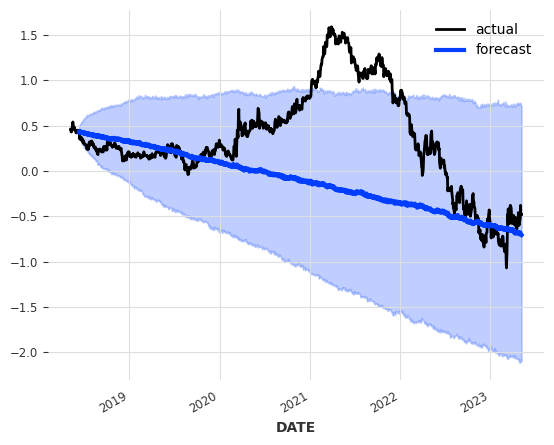

In [14]:
series.plot(label='actual')
prediction.plot(label='forecast', lw=3)
plt.legend()

SARIMAX

In [15]:
from IPython.display import display

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from time import time
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

RANDOM_SEED = np.random.seed(0)

Text(0, 0.5, 'Sales')

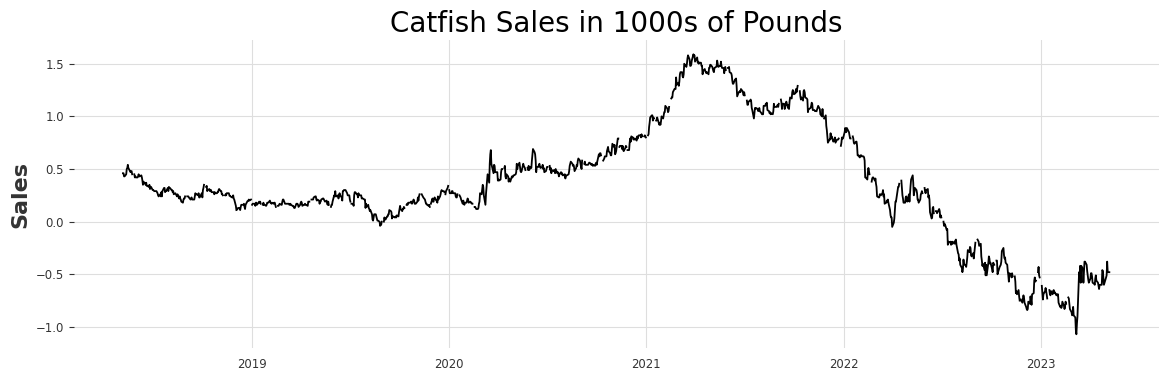

In [16]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')
#read data
catfish_sales = pd.read_csv('T10Y2Y.csv', parse_dates=[0], index_col=0, date_parser=parser, na_values='.')
#infer the frequency of the data
catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))

#transform
start_date = datetime(2018,5,8)
end_date = datetime(2023,5,8)
lim_catfish_sales = catfish_sales[start_date:end_date]

#plot
plt.figure(figsize=(14,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [17]:
np.isfinite(lim_catfish_sales['T10Y2Y'])

DATE
2018-05-08    True
2018-05-09    True
2018-05-10    True
2018-05-11    True
2018-05-14    True
              ... 
2023-05-02    True
2023-05-03    True
2023-05-04    True
2023-05-05    True
2023-05-08    True
Freq: B, Name: T10Y2Y, Length: 1305, dtype: bool

In [18]:
lim_catfish_sales[lim_catfish_sales.index.isin(np.isfinite(lim_catfish_sales[['T10Y2Y']]).query('not T10Y2Y').index)]

,T10Y2Y
DATE,
2018-05-28,NaN
2018-07-04,NaN
2018-09-03,NaN
2018-10-08,NaN
2018-11-12,NaN
2018-11-22,NaN
2018-12-05,NaN
2018-12-25,NaN
2019-01-01,NaN


In [19]:
lim_catfish_sales['T10Y2Y'] = lim_catfish_sales['T10Y2Y'].fillna(0)

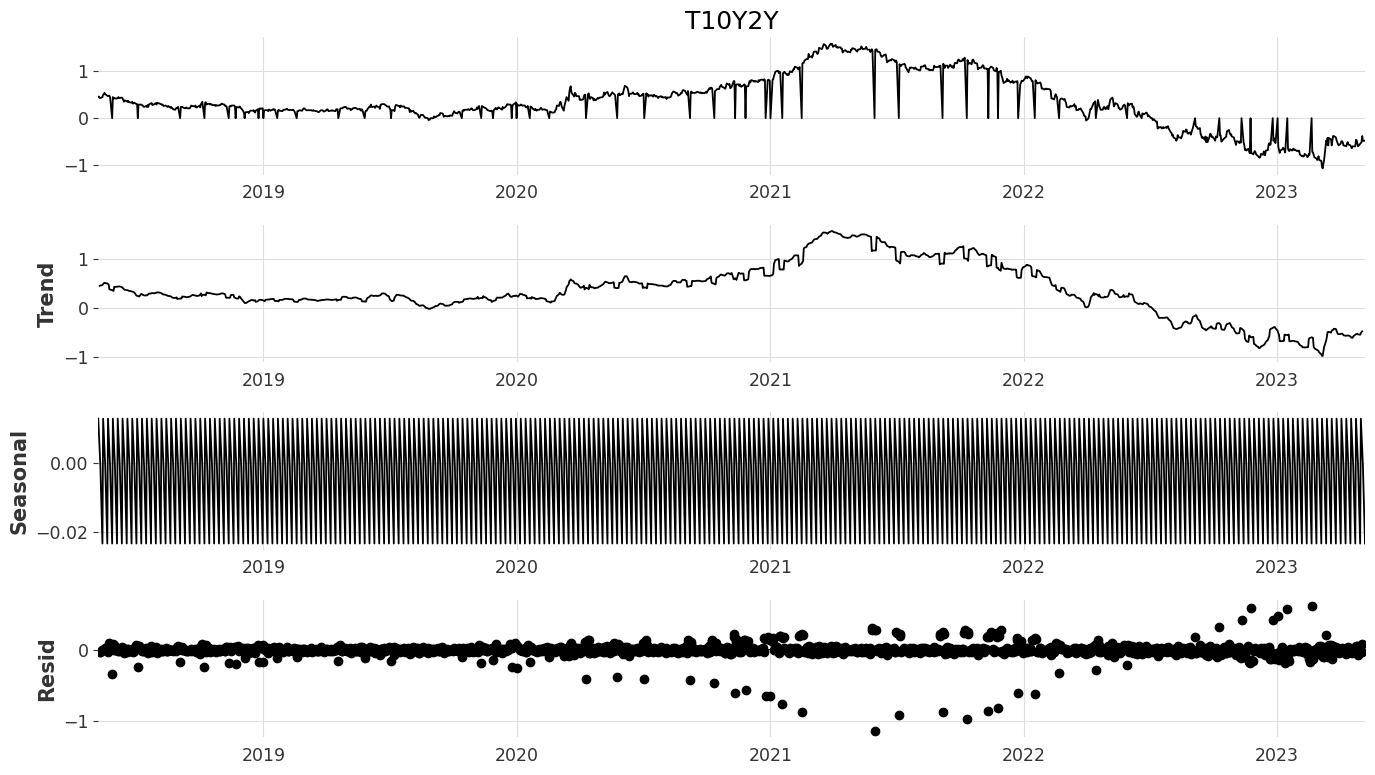

In [20]:
plt.rc('figure',figsize=(14,8))
plt.rc('font',size=15)

result = seasonal_decompose(lim_catfish_sales['T10Y2Y'],model='additive')
fig = result.plot()

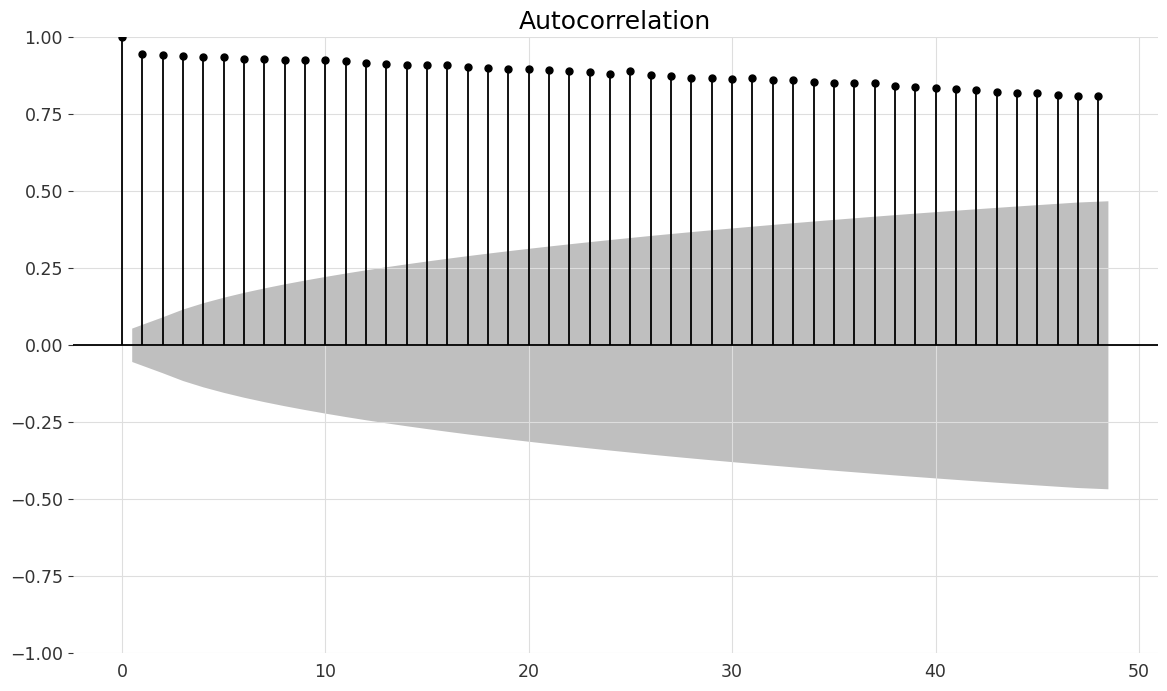

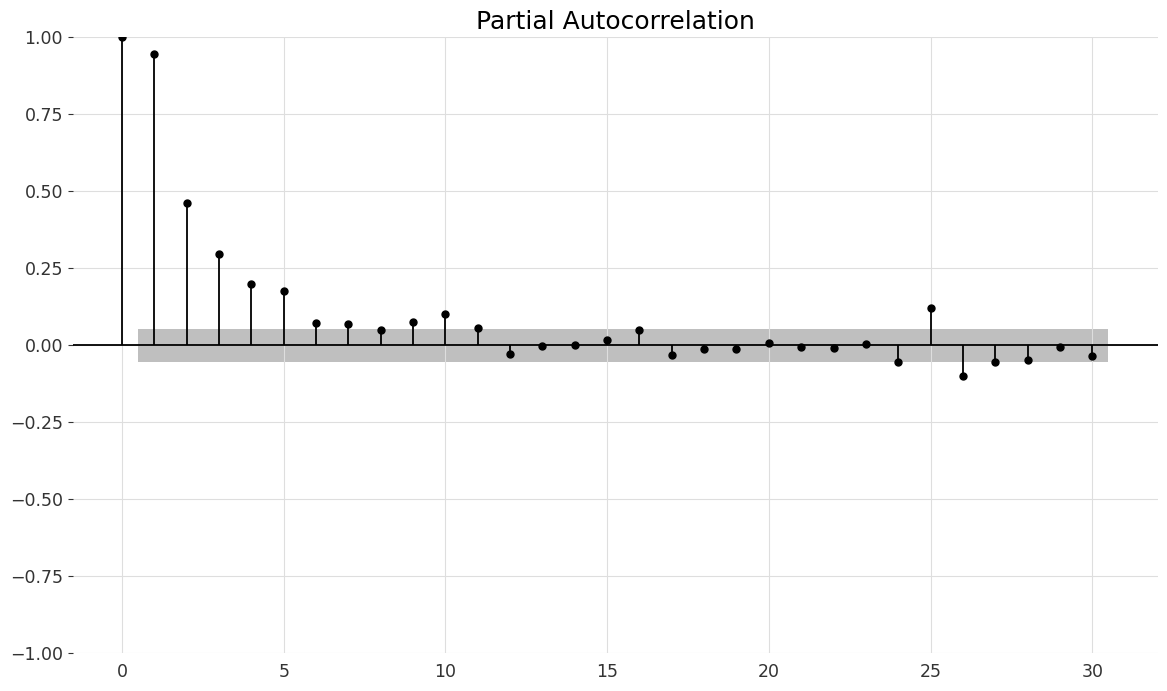

In [21]:
plot_acf(lim_catfish_sales['T10Y2Y'], lags=48);
plot_pacf(lim_catfish_sales['T10Y2Y'], lags=30);

In [22]:
arima = sm.tsa.arima.ARIMA(lim_catfish_sales['T10Y2Y'], order=(12,1,1))
predictions = arima.fit().predict()

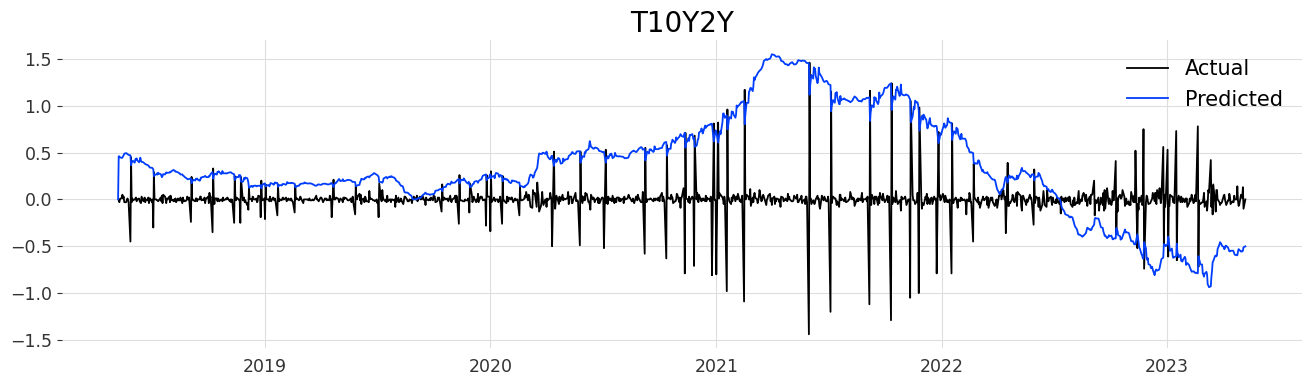

In [23]:
plt.figure(figsize=(16,4))
plt.plot(lim_catfish_sales.diff(), label="Actual")
plt.plot(predictions, label="Predicted")
plt.title('T10Y2Y', fontsize=20)
plt.ylabel('', fontsize=16)
plt.legend()

SARIMA

In [24]:
sarima = SARIMAX(lim_catfish_sales['T10Y2Y'],
                order=(1,1,1),
                seasonal_order=(1,1,0,12))
predictions = sarima.fit().predict()

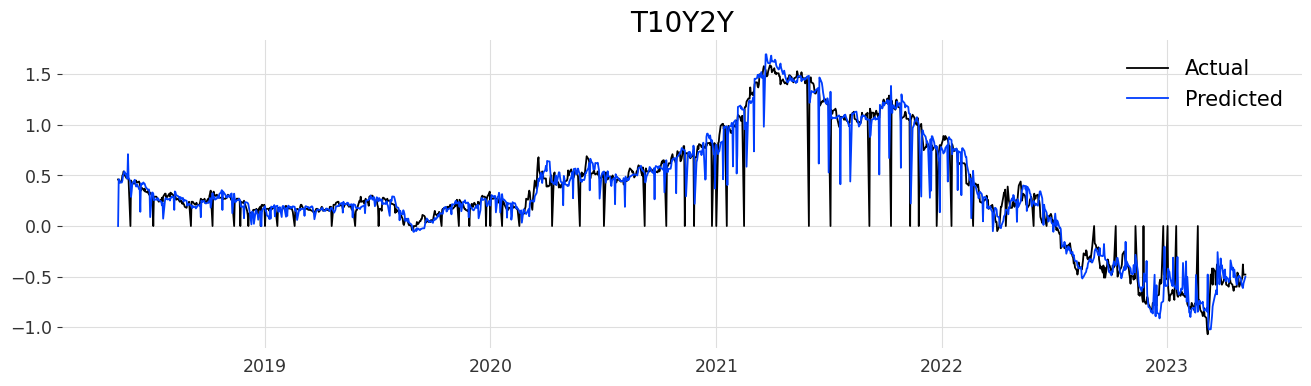

In [25]:
plt.figure(figsize=(16,4))
plt.plot(lim_catfish_sales, label="Actual")
plt.plot(predictions, label="Predicted")
plt.title('T10Y2Y', fontsize=20)
plt.ylabel('', fontsize=16)
plt.legend()

PROPHET

In [26]:
from darts.models import Prophet
from darts.models import ExponentialSmoothing
from darts import TimeSeries

models = [ExponentialSmoothing(), Prophet()]

series = TimeSeries.from_dataframe(T10Y2Y,'DATE','T10Y2Y', freq='B',fill_missing_dates=True)
backtests = [model.historical_forecasts(series,
                            start=.5,
                            forecast_horizon=3)
             for model in models]

Выходные данные были обрезаны до нескольких последних строк (5000).
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyk0q8bgw/qksdg6s2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyk0q8bgw/htnkajhx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81385', 'data', 'file=/tmp/tmpyk0q8bgw/qksdg6s2.json', 'init=/tmp/tmpyk0q8bgw/htnkajhx.json', 'output', 'file=/tmp/tmpyk0q8bgw/prophet_modellnzdkvie/prophet_model-20230510172048.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:20:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:20:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonali

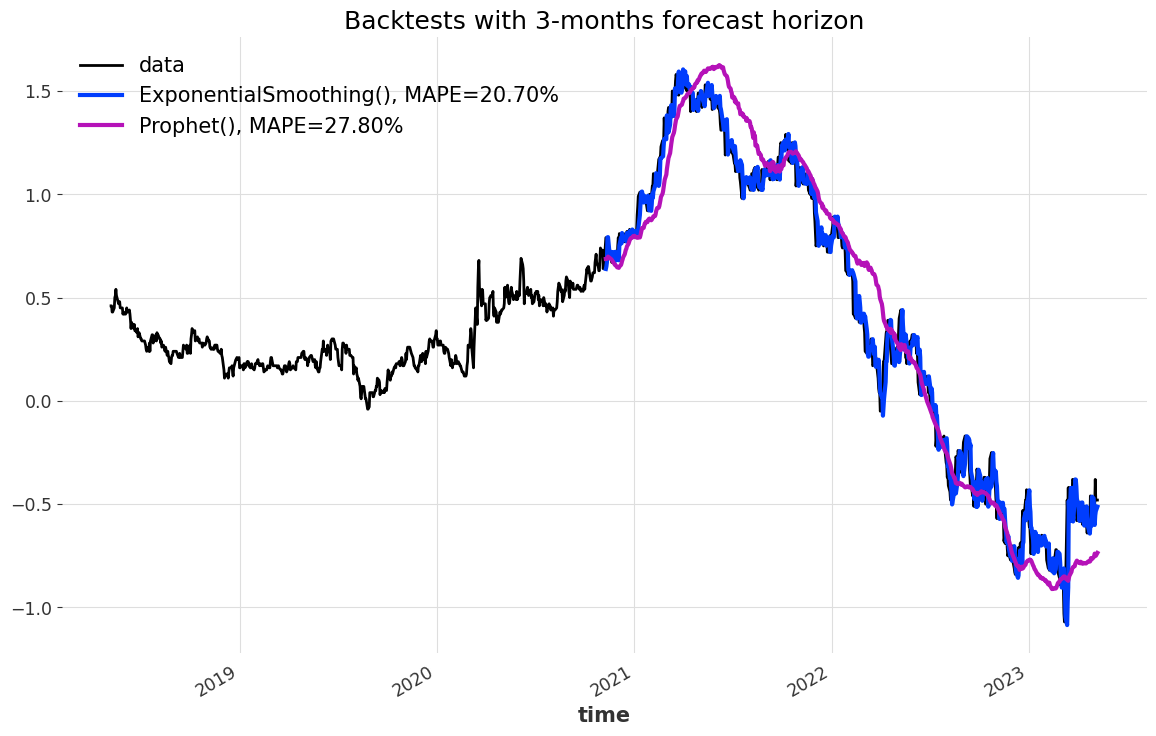

In [27]:
from darts.metrics import mape

series.plot(label='data')
for i, m in enumerate(models):
    err = mape(backtests[i], series)
    backtests[i].plot(lw=3, label='{}, MAPE={:.2f}%'.format(m, err))

plt.title('Backtests with 3-months forecast horizon')
plt.legend()